In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/AI_study/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Features
- Pregnacies : 임신 횟수
- Glucose: 혈당 수치
- BloodPressure: 혈압 (mm Hg)
- SkinThickness: 피부 두께 (mm)
- Insulin: 인슐린 수치 (mu U/ml)
- BMI (Body Mass Index): 체질량 지수
- DiabetesPedigreeFunction: 당뇨병 유전력 함수
- Age: 나이
- Outcome: 당뇨병 여부 (0 or 1) - label


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# 데이터 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df = df.drop('Outcome', axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


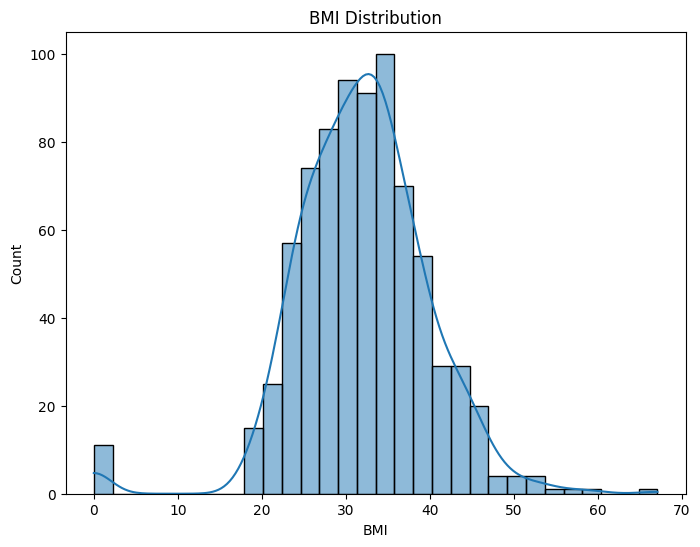

In [7]:
# 히스토그램으로 BMI 분포 시각화
plt.figure(figsize=(8, 6))

sns.histplot(data=df, x="BMI", kde=True, bins=30, color="#1f77b4")

# 그래프 제목과 축 라벨 설정
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI Distribution")

plt.show()

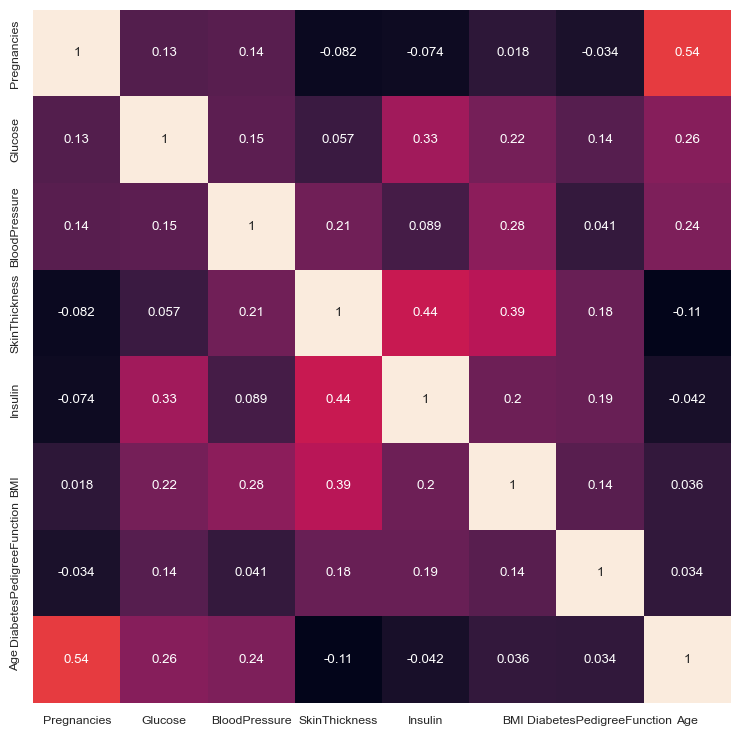

In [8]:
#상관관계 히트맵 생성
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(9,9))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

## label인 BMI과 높은 상관 관계를 맺는 features
- Glucose(0.22)
- BloodPressure(0.28)
- SkinThickness(0.39)
- Insulin(0.2)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

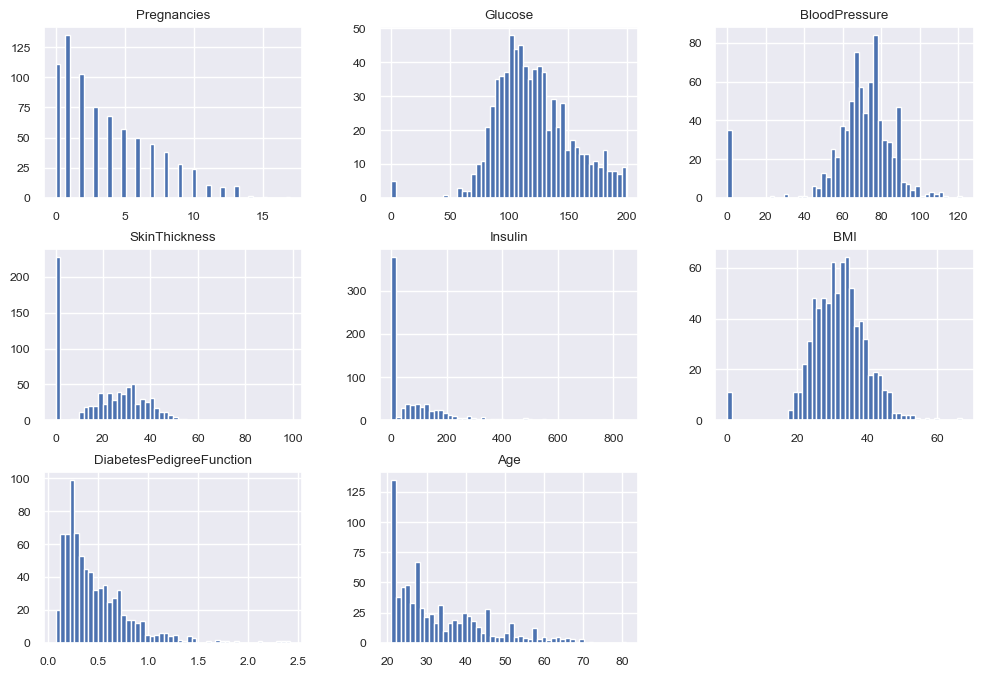

In [9]:
df.hist(bins=50, figsize=(12, 8))

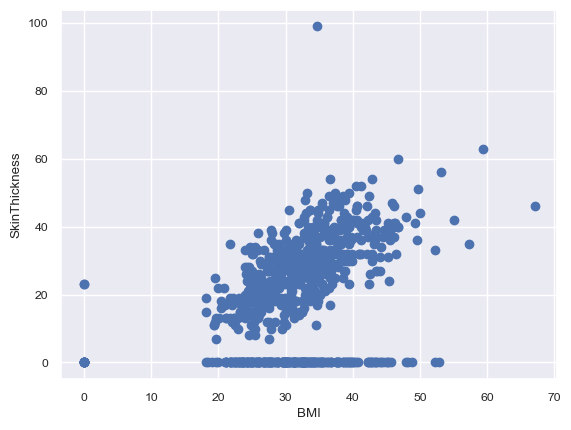

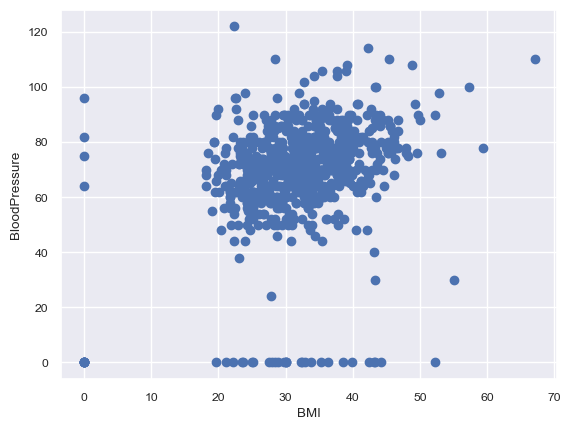

In [10]:
# BMI와 SkinThickness 관계
plt.scatter(df['BMI'], df['SkinThickness'])
plt.xlabel('BMI')
plt.ylabel('SkinThickness')

plt.show()

# BMI와 BloodPressure 관계
plt.scatter(df['BMI'], df['BloodPressure'])
plt.xlabel('BMI')
plt.ylabel('BloodPressure')

plt.show()

In [11]:
# 각 열에서 0인 값의 개수를 확인
zero_values_count = (df == 0).sum()

# 결과 출력
print(zero_values_count)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


#### Glucose(혈당 수치), BloodPressure(혈압), SkinThickness(피부 두께), Insulin(인슐린 수치), BMI(체질량 지수)가 0 값이 나오는 것은 이상치로 판단

In [12]:
# 이상치의 개수가 적은 Glucose, BloodPressure, BMI의 경우 이상치 제거
print("제거 전 데이터 개수: ", len(df))
df = df[(df['Glucose'] != 0) & 
        (df['BloodPressure'] != 0) & 
        (df['BMI'] != 0)]
print("제거 후 데이터 개수: ", len(df))

제거 전 데이터 개수:  768
제거 후 데이터 개수:  724


42개의 데이터 제거

Skin Thickness, BMI의 경우 이상치를 가진 데이터가 많고, 이상치를 제외하면 정규 분포를 따르기 때문에 평균값으로 대체

In [13]:
# 평균에 0인 값이 포함되면 평균치가 달라지므로 0인 값을 NaN으로 대체한 후 평균 계산후 대체
# SkinThickness와 Insulin의 0을 NaN으로 변경
df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)

# SkinThickness와 Insulin의 NaN 값을 평균값으로 대체
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

C:\Users\yc_hur\AppData\Local\Temp\ipykernel_3848\71297009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)
C:\Users\yc_hur\AppData\Local\Temp\ipykernel_3848\71297009.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
C:\Users\yc_hur\AppData\Local\Temp\ipykernel_3848\71297009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.182331,156.056122,32.467127,0.474765,33.350829
std,3.362803,30.750030,12.379870,9.018907,87.395294,6.888941,0.332315,11.765393
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,118.250000,27.500000,0.245000,24.000000
50%,3.000000,117.000000,72.000000,29.182331,156.056122,32.400000,0.379000,29.000000
75%,6.000000,142.000000,80.000000,33.000000,156.056122,36.600000,0.627500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

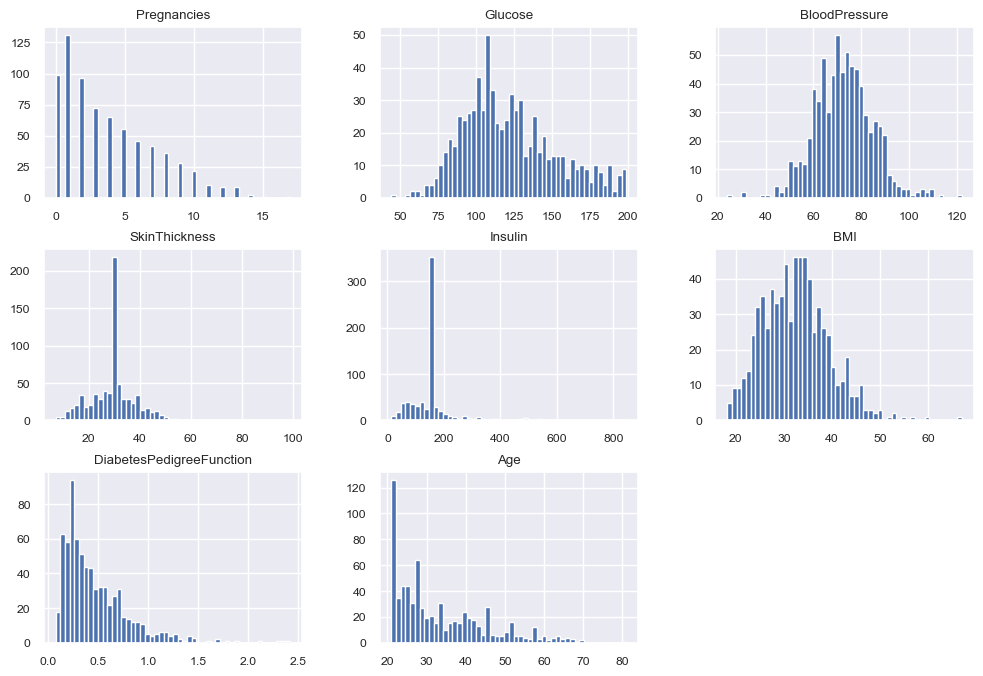

In [15]:
df.hist(bins=50, figsize=(12, 8))

In [16]:
y = df['BMI']
y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 724, dtype: float64

In [17]:
X = df.drop('BMI', axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,156.056122,0.627,50
1,1,85,66,29.000000,156.056122,0.351,31
2,8,183,64,29.182331,156.056122,0.672,32
3,1,89,66,23.000000,94.000000,0.167,21
4,0,137,40,35.000000,168.000000,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,0.171,63
764,2,122,70,27.000000,156.056122,0.340,27
765,5,121,72,23.000000,112.000000,0.245,30
766,1,126,60,29.182331,156.056122,0.349,47


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((463, 7), (145, 7), (463,), (145,))

In [19]:
# 표준화 StandardScaler 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
val_scaled = ss.transform(X_val)
test_scaled = ss.transform(X_test)

## DL Model (ANN)

In [20]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(7,)))  # 회귀를 위한 'linear' 활성화 함수 사용
model.compile(loss='mse', optimizer='adam', metrics=['mse'])  # 손실 함수 'mse' 사용
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [21]:
batch_size = 16

train_epochs = 50
history = model.fit(train_scaled, y_train, epochs=train_epochs, batch_size=batch_size, validation_data=(val_scaled, y_val), verbose=True, shuffle=True)

Epoch 1/50
29/29 [==============================] - 1s 5ms/step - loss: 1112.9495 - mse: 1112.9495 - val_loss: 1099.6274 - val_mse: 1099.6274
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 1110.9087 - mse: 1110.9087 - val_loss: 1097.5380 - val_mse: 1097.5380
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 1108.8789 - mse: 1108.8789 - val_loss: 1095.5178 - val_mse: 1095.5178
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 1106.8722 - mse: 1106.8722 - val_loss: 1093.4067 - val_mse: 1093.4067
Epoch 5/50
29/29 [==============================] - 0s 2ms/step - loss: 1104.8553 - mse: 1104.8553 - val_loss: 1091.3832 - val_mse: 1091.3832
Epoch 6/50
29/29 [==============================] - 0s 2ms/step - loss: 1102.8464 - mse: 1102.8464 - val_loss: 1089.3650 - val_mse: 1089.3650
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 1100.8566 - mse: 1100.8566 - val_loss: 1087.3129 - val_mse: 1087.3129
Epoch 

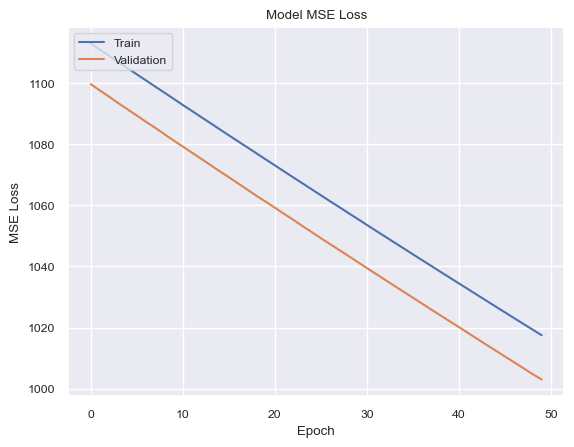

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE Loss')  # 'model loss'를 'Model MSE Loss'로 변경
plt.ylabel('MSE Loss')  # y축 레이블을 'MSE Loss'로 변경
plt.xlabel('Epoch')  # x축 레이블은 'Epoch' 그대로 유지
plt.legend(['Train', 'Validation'], loc='upper left')  # 범례 그대로 유지
plt.show()

5/5 [==============================] - 0s 747us/step
MSE: 968.9491167306614
MAE: 30.492413556000283
R^2 Score: -21.61428360562419


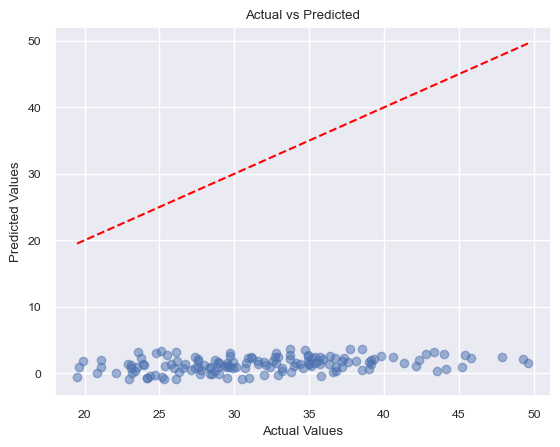

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 모델이 예측한 연속적인 값 (회귀)
predy = model.predict(test_scaled)

# 성능 지표 계산 (MSE, MAE, R^2)
mse = mean_squared_error(y_test, predy)
mae = mean_absolute_error(y_test, predy)
r2 = r2_score(y_test, predy)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2 Score: {r2}')

# 예측값 vs 실제값 시각화
plt.scatter(y_test, predy, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

출력층만 존재하는 신경망은 전혀 학습이 되지 않는 것을 볼 수 있음

## DL_Model(DNN)

In [28]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(15, activation='relu', input_shape=(7,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 15)                120       
                                                                 
 dense_7 (Dense)             (None, 30)                480       
                                                                 
 dense_8 (Dense)             (None, 45)                1395      
                                                                 
 dense_9 (Dense)             (None, 30)                1380      
                                                                 
 dense_10 (Dense)            (None, 15)                465       
                                                                 
 dense_11 (Dense)            (None, 1)                 16        
                                                                 
Total params: 3,856
Trainable params: 3,856
Non-traina

In [29]:
batch_size = 16

train_epochs = 50
history = model.fit(train_scaled, y_train, epochs=train_epochs, batch_size=batch_size, validation_data=(val_scaled, y_val), verbose=True, shuffle=True)

Epoch 1/50
29/29 [==============================] - 1s 8ms/step - loss: 1076.7928 - mse: 1076.7928 - val_loss: 1016.2872 - val_mse: 1016.2872
Epoch 2/50
29/29 [==============================] - 0s 5ms/step - loss: 845.9991 - mse: 845.9991 - val_loss: 526.2727 - val_mse: 526.2727
Epoch 3/50
29/29 [==============================] - 0s 4ms/step - loss: 243.4560 - mse: 243.4560 - val_loss: 124.7428 - val_mse: 124.7428
Epoch 4/50
29/29 [==============================] - 0s 4ms/step - loss: 120.1489 - mse: 120.1489 - val_loss: 98.5187 - val_mse: 98.5187
Epoch 5/50
29/29 [==============================] - 0s 4ms/step - loss: 94.8522 - mse: 94.8522 - val_loss: 77.2720 - val_mse: 77.2720
Epoch 6/50
29/29 [==============================] - 0s 3ms/step - loss: 80.9190 - mse: 80.9190 - val_loss: 66.9339 - val_mse: 66.9339
Epoch 7/50
29/29 [==============================] - 0s 3ms/step - loss: 72.9224 - mse: 72.9224 - val_loss: 61.4967 - val_mse: 61.4967
Epoch 8/50
29/29 [==========================

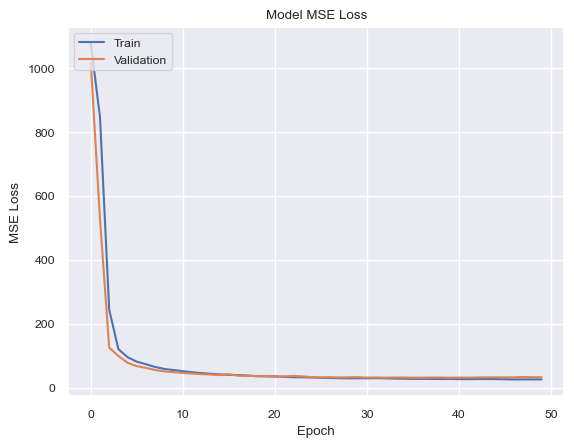

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE Loss')  # 'model loss'를 'Model MSE Loss'로 변경
plt.ylabel('MSE Loss')  # y축 레이블을 'MSE Loss'로 변경
plt.xlabel('Epoch')  # x축 레이블은 'Epoch' 그대로 유지
plt.legend(['Train', 'Validation'], loc='upper left')  # 범례 그대로 유지
plt.show()

에포크 10 ~ 20까지 이상적으로 mse가 줄어드는 모습을 볼 수 있음

5/5 [==============================] - 0s 1ms/step
MSE: 30.99671226278811
MAE: 4.461311734955887
R^2 Score: 0.2765683668531921


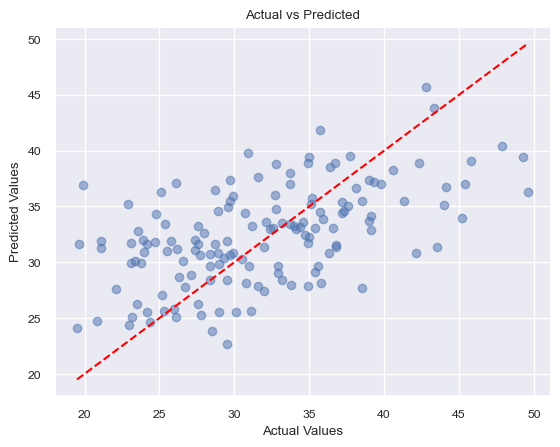

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 모델이 예측한 연속적인 값 (회귀)
predy = model.predict(test_scaled)

# 성능 지표 계산 (MSE, MAE, R^2)
mse = mean_squared_error(y_test, predy)
mae = mean_absolute_error(y_test, predy)
r2 = r2_score(y_test, predy)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2 Score: {r2}')

# 예측값 vs 실제값 시각화
plt.scatter(y_test, predy, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()